Javier Francisco Castilla Jiménez
* Ejercicio 5
* Práctica 1

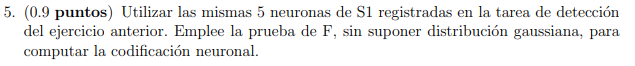

In [9]:
import numpy as np 
import matplotlib.pyplot as plt
import NeuralFunctJC as nrn
plt.style.use('Solarize_Light2')

In [10]:
neuronas=['A','B','C','D','E']
amplitudes=['0','6','8','10','12','24']
amprob={'0':0.5,'6':1/5,'8':1/5,'10':1/5,'12':1/5,'24':1/5}

In [11]:
NeuDetS1A=nrn.importar('Neu_Det_S1A.csv')
NeuDetS1B=nrn.importar('Neu_Det_S1B.csv')
NeuDetS1C=nrn.importar('Neu_Det_S1C.csv')
NeuDetS1D=nrn.importar('Neu_Det_S1D.csv')
NeuDetS1E=nrn.importar('Neu_Det_S1E.csv')
Neurons={'A':NeuDetS1A,'B':NeuDetS1B,'C':NeuDetS1C,'D':NeuDetS1D,'E':NeuDetS1E}

In [12]:
bqA=list((nrn.bloques(nrn.abrir('Neu_Det_S1A.csv'))))
bqB=list((nrn.bloques(nrn.abrir('Neu_Det_S1B.csv'))))
bqC=list((nrn.bloques(nrn.abrir('Neu_Det_S1C.csv'))))
bqD=list((nrn.bloques(nrn.abrir('Neu_Det_S1D.csv'))))
bqE=list((nrn.bloques(nrn.abrir('Neu_Det_S1E.csv'))))
bqs={'A':bqA,'B':bqB,'C':bqC,'D':bqD,'E':bqE}

In [13]:
def dicneuronrate(dictneu,keyneuron,start=-1,stop=3,paso=0.01,ventana=0.2,nv=True):
    """
    Esta función crea un diccionario donde las claves son los nombres de las neuronas y los valores
    son las tasas de disparo de cada neurona. 
    keyneurons:son las claves/llaves de cada neurona. Es una lista. o tupla.
    dictneu:es un diccionario dónde las llaves son keyneurons y los valores son los 
    datos crudos de todos los ensayos de una neurona
    salida es un diccionario."""
    Tns={clave:0 for clave in keyneuron}
    bsup,nven=nrn.bordesup(start,stop,paso,ventana,nv=True) 
    func=lambda ensayo : nrn.tasa(ensayo,nventanas=nven,paso=paso,ventana=ventana,start=start)# esta función calcula la tasa de disparo de un ensayo nventanas, paso=0.01,ventana=0.05,start=-2 
    for llave in keyneuron:
        fr=map(func,dictneu[llave]) # array con las tasas de disparo para cada ventana
        Tns[llave]=np.array(list(fr))
    return Tns

In [14]:
def txclases(tasas,keyneuron,bqs):
    """tasas"""
    #tasas de disparo separadas por amplitud del estímulo en un diccionario de diccionarios
    Txclases={a:0 for a in keyneuron}
    for llave in keyneuron:
        bloques=nrn.clases(tasas[llave],bqs[llave])
        #clases={keyclases[i]:bloques[i] for i in range(len(keyclases))}
        Txclases[llave]=bloques
    return Txclases

In [15]:
Tns1=dicneuronrate(Neurons,neuronas)
txclas=txclases(Tns1,neuronas,bqs)    

In [16]:
txclas

{'A': [array([[ 75.,  80.,  85., ...,  45.,  35.,  30.],
         [ 35.,  35.,  30., ...,  45.,  45.,  45.],
         [ 75.,  75.,  75., ...,  70.,  65.,  55.],
         ...,
         [ 50.,  55.,  55., ...,  25.,  25.,  30.],
         [160., 160., 150., ...,  95.,  85.,  85.],
         [ 20.,  25.,  25., ...,  60.,  50.,  50.]]),
  array([[35., 30., 35., ..., 75., 70., 70.],
         [45., 40., 35., ..., 25., 25., 25.],
         [30., 35., 35., ..., 40., 45., 40.],
         ...,
         [60., 45., 45., ..., 55., 55., 50.],
         [60., 65., 65., ..., 60., 65., 60.],
         [75., 75., 85., ..., 30., 20., 15.]]),
  array([[110., 105.,  95., ...,  60.,  55.,  55.],
         [ 45.,  45.,  50., ...,  35.,  35.,  30.],
         [ 60.,  60.,  60., ...,  15.,  10.,  10.],
         ...,
         [ 70.,  75.,  65., ...,  10.,  10.,  10.],
         [ 30.,  25.,  25., ...,  60.,  60.,  50.],
         [ 50.,  45.,  45., ...,  40.,  40.,  35.]]),
  array([[50., 50., 40., ..., 70., 70., 65.],
 

In [31]:
def Fvalue(tasaxclases,keycondiciones):
    ncondiciones=len(keycondiciones)
    nv=len(tasaxclases[0][0])
    medias=[]
    desviaciones=[]
    for i in range(ncondiciones):
        media=np.mean(tasaxclases[i],axis=0)
        desv=np.std(tasaxclases[i],axis=0)
        medias.append(media)
        desviaciones.append(desv)
    medias=np.vstack(medias)
    desviaciones=np.vstack(desviaciones)
    sgdmedias=np.std(medias,axis=0)
    mediadsg=np.mean(desviaciones,axis=0)
    F=sgdmedias/mediadsg
    return F
        

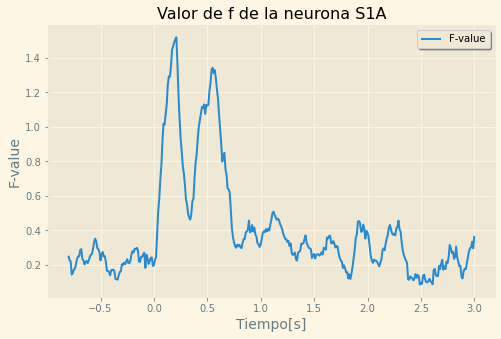

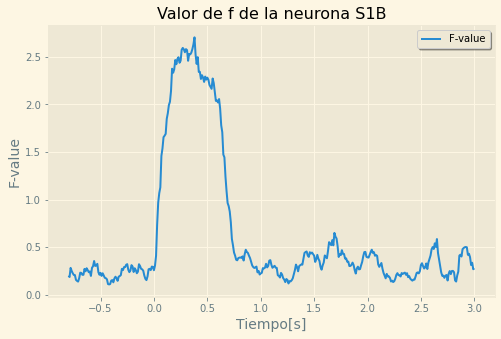

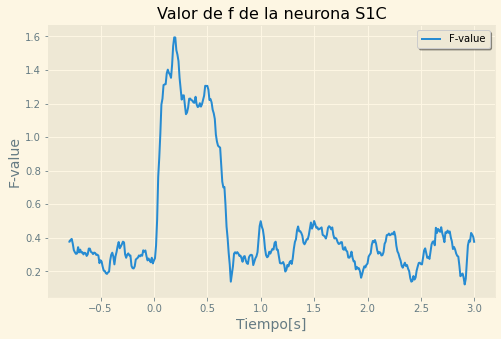

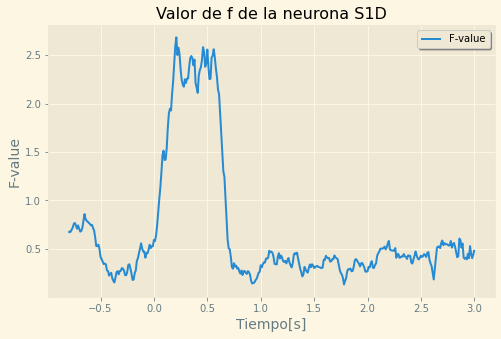

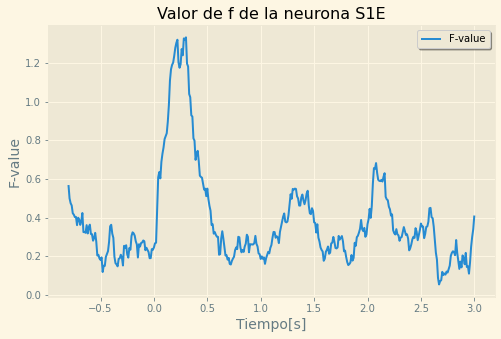

In [34]:
efes=dict()
bsup,nven=nrn.bordesup(start=-1,stop=3,paso=0.01,ventana=0.2,nv=True) 
for llave in neuronas:
    f=Fvalue(txclas[llave],amplitudes)
    efes.update({llave:f})
    ######## Figura
    fig = plt.figure(figsize=(8,5))
    plt.plot(bsup,f,label='F-value')
    plt.xlabel("Tiempo[s]",fontsize=14)
    plt.ylabel("F-value",fontsize=14)
    plt.title("Valor de f de la neurona S1"+llave)
    plt.legend(fontsize="medium",shadow=True,fancybox=True)
    plt.show()

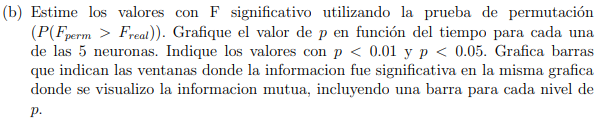

In [41]:
def permutacion(data,nperm=1000):
    """
    esta función permuta los datos de las tasa de disparo de una neurona y guarda 
    en una lista las permutaciones donde cada elemento de las lista es una permutación 
    de los datos
    """
    forma=data.shape
    ndat=forma[0]*forma[1]
    aplana=data.flatten()
    permutaciones=[aplana[np.random.permutation(ndat)].reshape(forma) for i in range(nperm)]
    return permutaciones

In [42]:
def fvalue_permutados(data,bqs,condiciones,nperm=1000):
    pr_f=[]
    permutaciones=permutacion(data,nperm)
    for b in range(nperm):
        tasapxc=nrn.clases(permutaciones[b],bqs)
        pr_f.append(Fvalue(tasapxc,condiciones))
    pr_f=np.vstack(pr_f)
    return pr_f

In [58]:
bsup,nven=nrn.bordesup(start=-1,stop=3,paso=0.01,ventana=0.2,nv=True) 
pes=dict()
for llave in neuronas:
    f_real=efes[llave]
    f_permutada=fvalue_permutados(Tns1[llave],bqs[llave],amplitudes)
    p=np.sum(f_permutada>f_real,axis=0)/len(f_permutada)
    pes.update({llave:p})

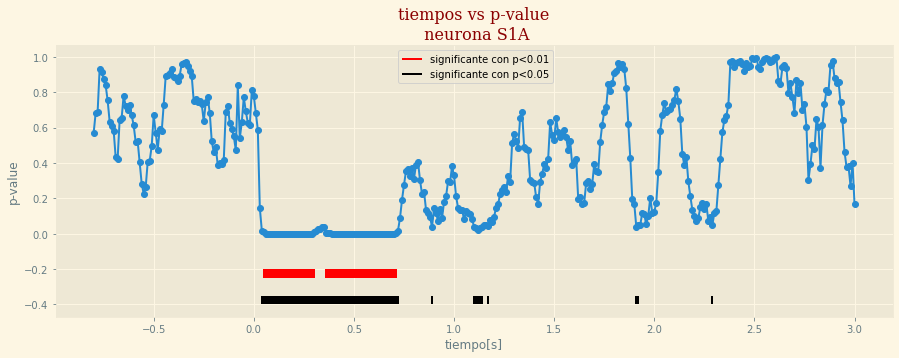

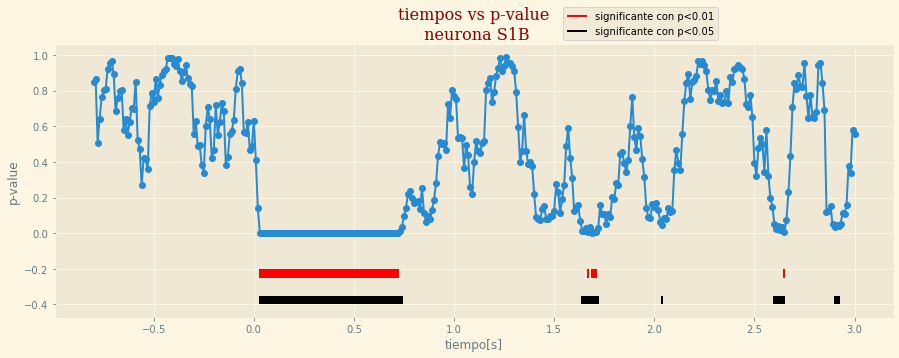

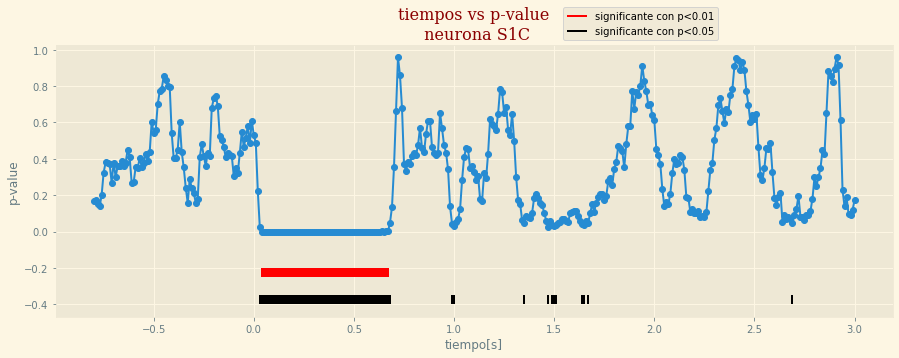

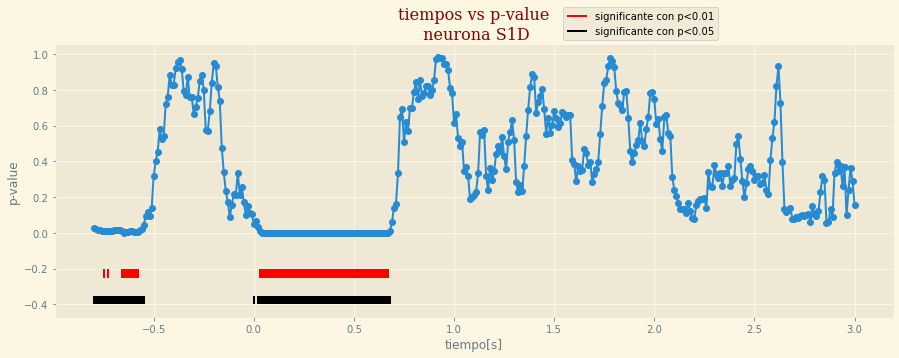

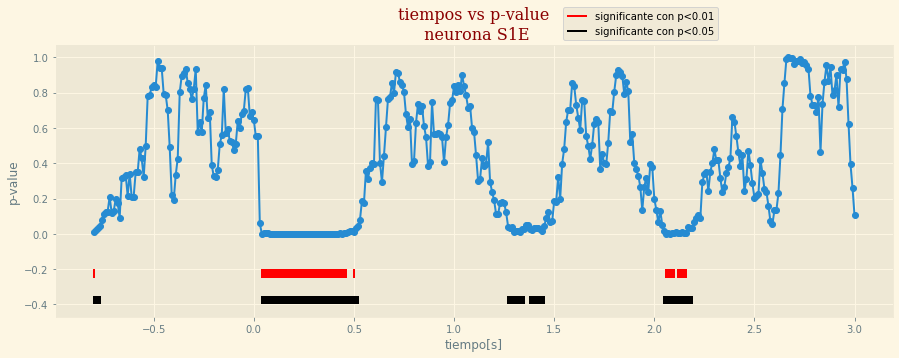

In [79]:
for llave in neuronas:
    Tsignificantes1=bsup[np.where(pes[llave]<0.01)]
    Tsignificantes2=bsup[np.where(pes[llave]<0.05)]
    fontdict_title = {'family': 'serif','color':  'darkred','weight': 'normal','size': 16,} # formato para el título
    fig,(ax1)=plt.subplots(nrows=1,ncols=1,sharex=False,figsize=(15,5))
    ax1.scatter(bsup,pes[llave])
    ax1.plot(bsup,pes[llave])
    ax1.vlines(Tsignificantes1,-0.20,-0.25,linestyles ="solid", colors ="red",label='significante con p<0.01')
    ax1.vlines(Tsignificantes2,-0.35,-0.40,linestyles ="solid", colors ="black",label='significante con p<0.05')
    ax1.set_ylabel('p-value')
    ax1.set_xlabel('tiempo[s]')
    ax1.set_title('tiempos vs p-value\n neurona S1'+llave, fontdict_title) 
    ax1.legend(loc='best', bbox_to_anchor=(0.6, 1))

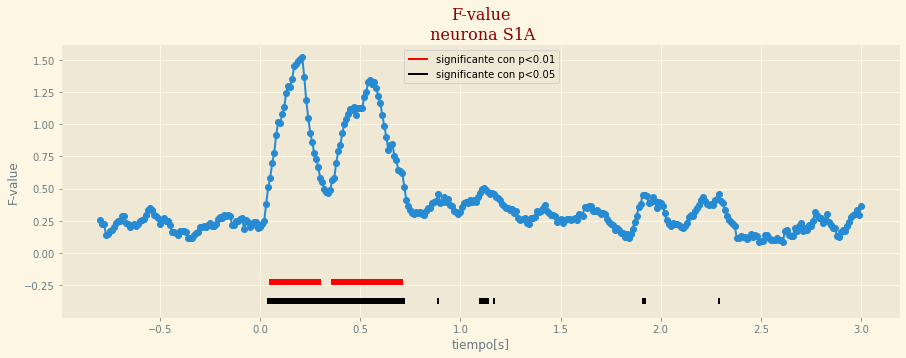

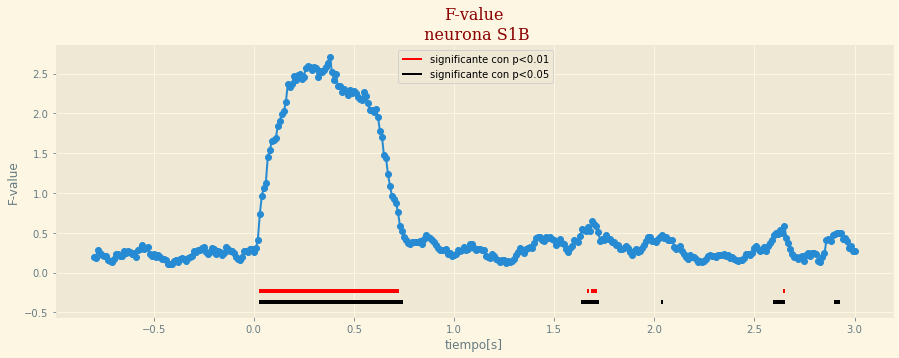

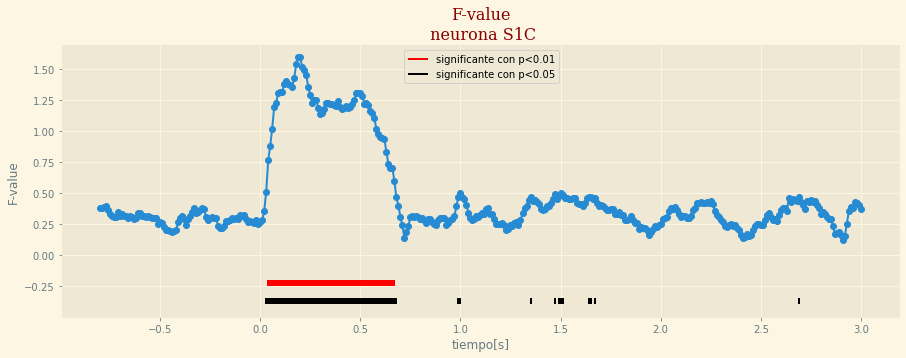

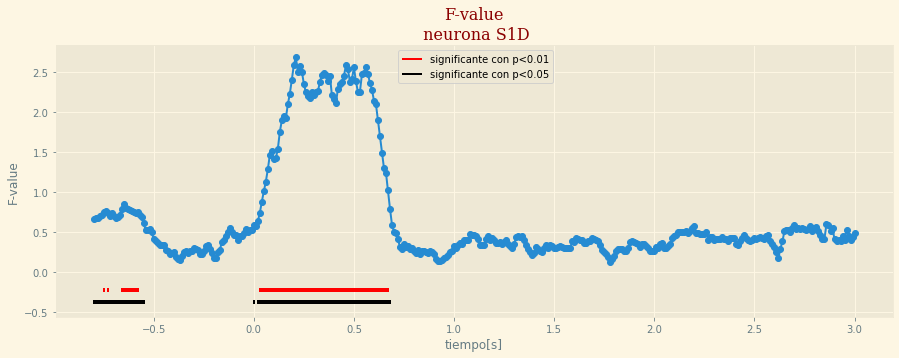

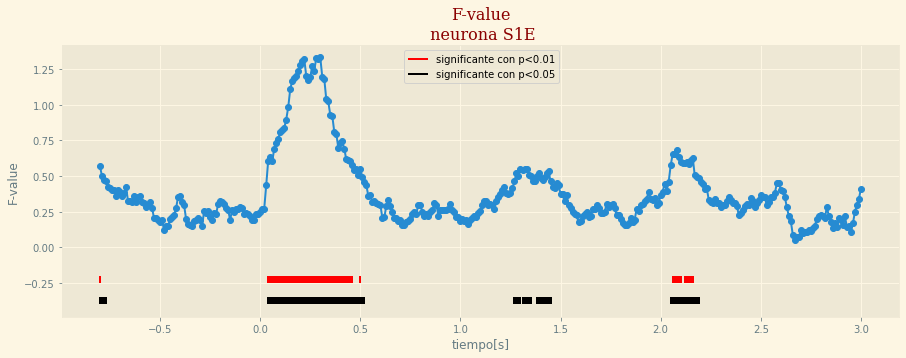

In [80]:
bsup,nven=nrn.bordesup(start=-1,stop=3,paso=0.01,ventana=0.2,nv=True) 
for llave in neuronas:
    ######## Figura
    Tsignificantes1=bsup[np.where(pes[llave]<0.01)]
    Tsignificantes2=bsup[np.where(pes[llave]<0.05)]
    fontdict_title = {'family': 'serif','color':  'darkred','weight': 'normal','size': 16,} # formato para el título
    fig,(ax1)=plt.subplots(nrows=1,ncols=1,sharex=False,figsize=(15,5))
    ax1.scatter(bsup,efes[llave])
    ax1.plot(bsup,efes[llave])
    ax1.vlines(Tsignificantes1,-0.20,-0.25,linestyles ="solid", colors ="red",label='significante con p<0.01')
    ax1.vlines(Tsignificantes2,-0.35,-0.40,linestyles ="solid", colors ="black",label='significante con p<0.05')
    ax1.set_ylabel('F-value')
    ax1.set_xlabel('tiempo[s]')
    ax1.set_title('F-value\n neurona S1'+llave, fontdict_title) 
    ax1.legend(loc='best', bbox_to_anchor=(0.6, 1))
    